In [1]:
from PythonTsa.datadir import getdtapath
import pandas as pd
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 9.2

In [2]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [3]:
ar = np.array([1,0,0,0,0,0,0,0,0,0,0,0.2])

In [4]:
np.random.seed(12347)
x = arma_generate_sample(ar=ar, ma=[1], nsample=720)
x = pd.Series(x)

<Axes: >

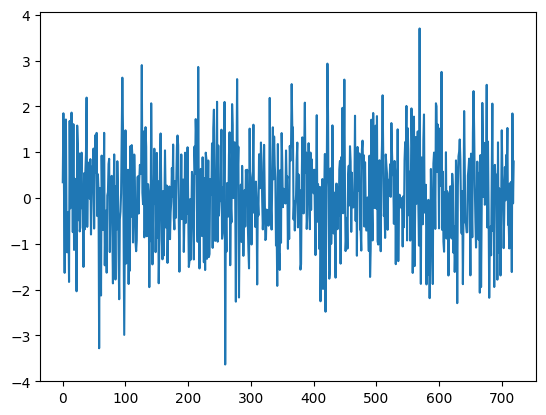

In [5]:
x.plot()

In [12]:
ar_rw = np.array([1,0,0,0,0,0,0,0,0,0,0,1])
np.random.seed(12347)
xrw = arma_generate_sample(ar=ar_rw, ma=[1], nsample=720)
xrw = pd.Series(xrw)

<Axes: >

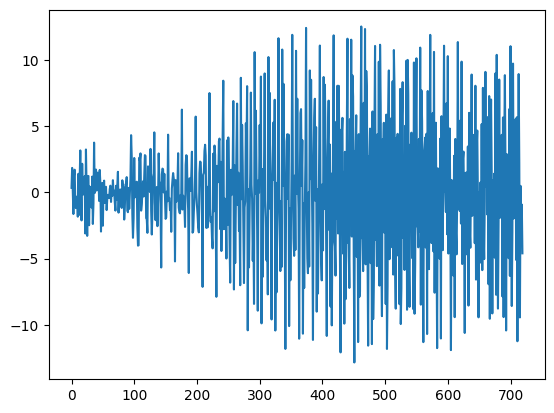

In [13]:
xrw.plot()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
dates = pd.date_range('1960-01', '2020-01', freq='M')
xrw.index = dates
x.index = dates

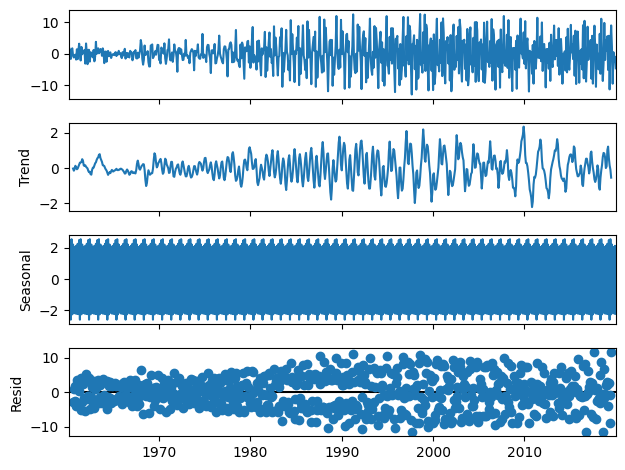

In [25]:
#sasonalidade da random walk sasonal 12 periodos
seasonal_decompose(xrw).plot()
plt.show()

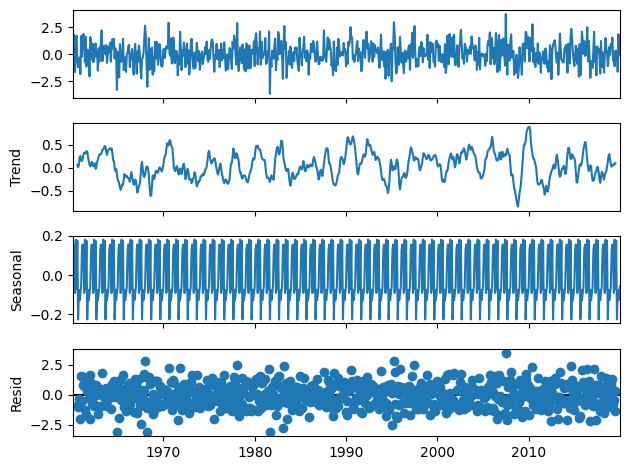

In [26]:
#sasonal do 0.2 12 periodos
seasonal_decompose(x).plot()
plt.show()

# 9.3

In [29]:
from PythonTsa.SimulSBM import simulSBM

In [35]:
x =simulSBM(seed=1357, fig=False)
y = simulSBM(seed=357, fig=False)
z = simulSBM(seed=3571, fig=False)

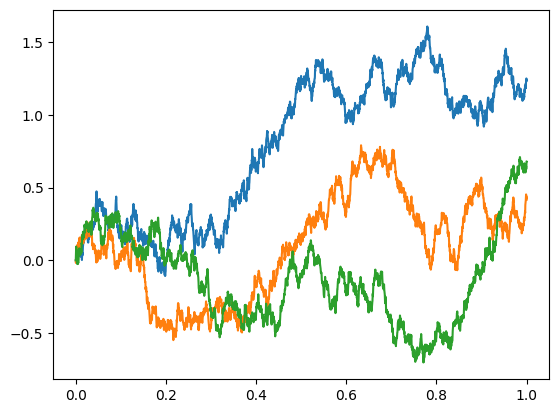

In [36]:
plt.plot(x)
plt.plot(y)
plt.plot(z)

In [42]:
dtapath=getdtapath()
RW = pd.read_csv(dtapath + 'RwalkwDrift0.3.csv', header = None)

<Axes: >

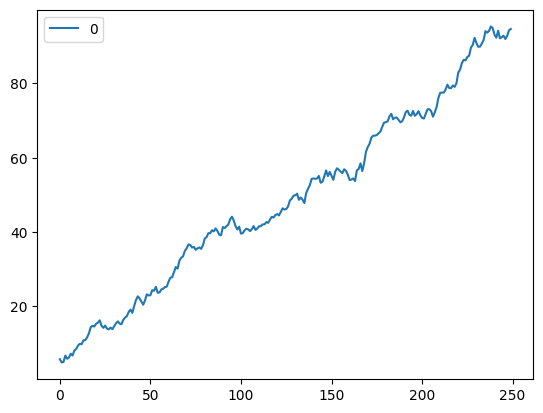

In [44]:
RW.plot()

In [53]:
t = pd.Series(range(len(RW)), dtype='float64')
t.index=RW.index
t.name = 'Trend'
ct = sm.add_constant(t)

In [55]:
t = pd.Series(range(len(RW)), dtype='float64')
t.index=RW.index
t.name = 'Trend'
ct = sm.add_constant(t)
mod = sm.OLS(RW , ct).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          1.67e-228
Time:                        14:56:33   Log-Likelihood:                -634.83
No. Observations:                 250   AIC:                             1274.
Df Residuals:                     248   BIC:                             1281.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9453      0.388     15.314      0.000       5.181       6.710
Trend          0.3453      0.003    127.999      0.000       0.340       0.351
==============================================================================
Omnibus:                        1.426   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.515
Skew:                           0.171   Prob(JB):                        0.469
Kurtosis:                       2.831   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

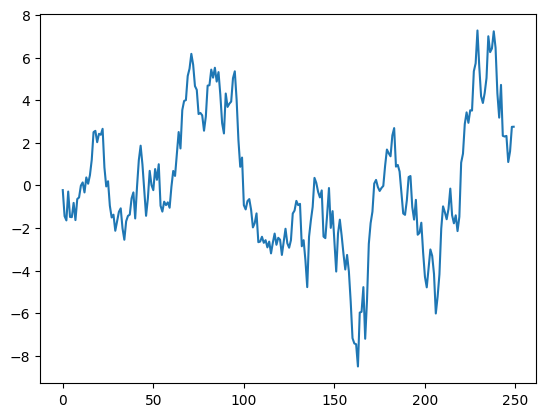

In [56]:
mod.resid.plot()

In [57]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig

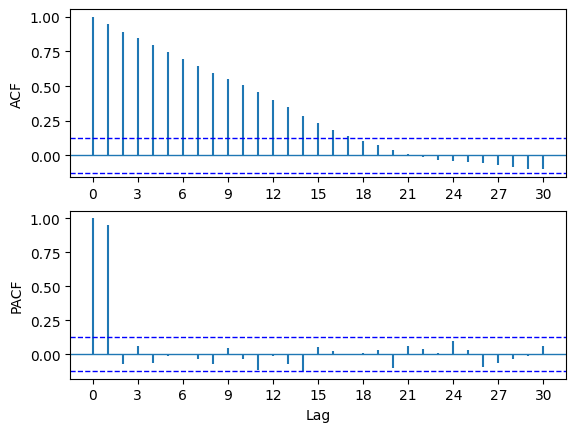

In [58]:
acf_pacf_fig(mod.resid, both = True)

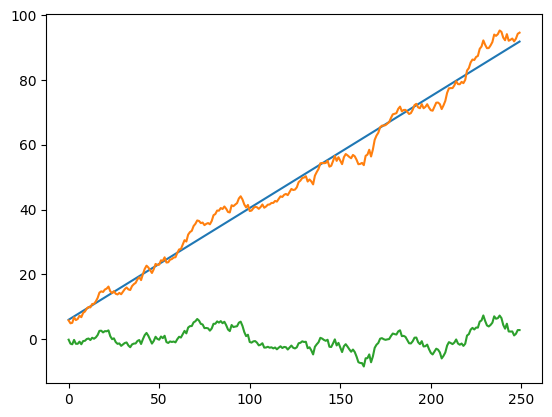

In [64]:
plt.plot(mod.fittedvalues)
plt.plot(RW)
plt.plot(mod.resid)

# 9.7

In [68]:
gdp = pd.read_csv(dtapath + 'us-q-rgdp.csv', header = 0)

<Axes: >

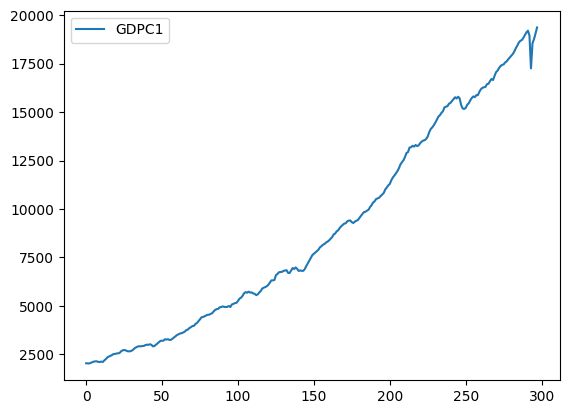

In [69]:
gdp.plot()

In [72]:
gdp.index = gdp['DATE']
gdp = gdp['GDPC1']

<Axes: xlabel='DATE'>

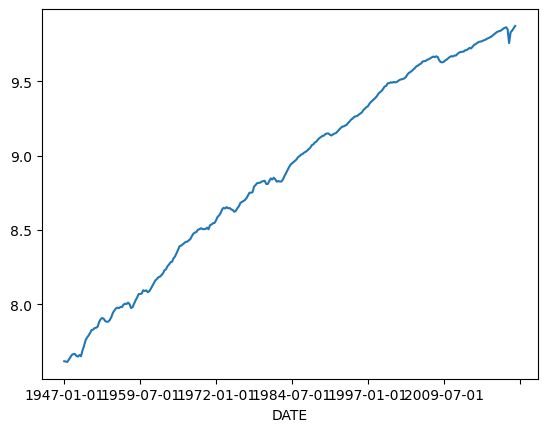

In [74]:
log_gdp = np.log(gdp)
log_gdp.plot()

In [76]:
 from arch.unitroot import PhillipsPerron

In [82]:
PhillipsPerron(log_gdp, trend = 'ct')

Test Statistic,-0.719
P-value,0.972
Lags,16


# 9.13

In [85]:
usm = pd.read_table(dtapath + 'USmacronInRate.txt', sep='\s+', header = 0)

In [87]:
timeindex = pd.date_range('1959-01', periods = len(usm), freq='QS')
usm.index = timeindex

<Axes: >

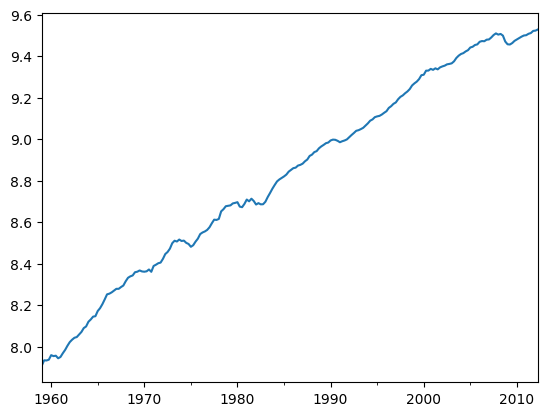

In [94]:
lgdp = np.log(usm['rgnp'])
lgdp.plot()

In [106]:
t = pd.Series(range(len(lgdp.diff().dropna())), dtype='float64')
t.index=lgdp.diff().dropna().index
t.name = 'Trend'
ct = sm.add_constant(t)
mod = sm.OLS(lgdp.diff().dropna()  , ct).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rgnp   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.026
Date:                Sat, 10 Aug 2024   Prob (F-statistic):            0.00506
Time:                        16:00:18   Log-Likelihood:                 709.19
No. Observations:                 213   AIC:                            -1414.
Df Residuals:                     211   BIC:                            -1408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.001      8.848      0.000       0.008       0.013
Trend      -2.748e-05    9.7e-06     -2.833      0.005   -4.66e-05   -8.36e-06
==============================================================================
Omnibus:                       23.846   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.543
Skew:                          -0.635   Prob(JB):                     4.27e-09
Kurtosis:                       4.653   Cond. No.                         244.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

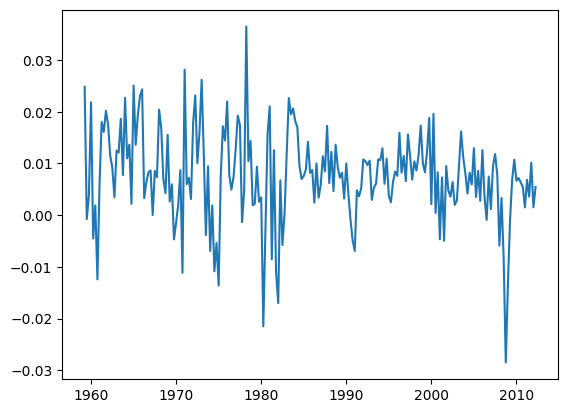

In [107]:
plt.plot(lgdp.diff().dropna())

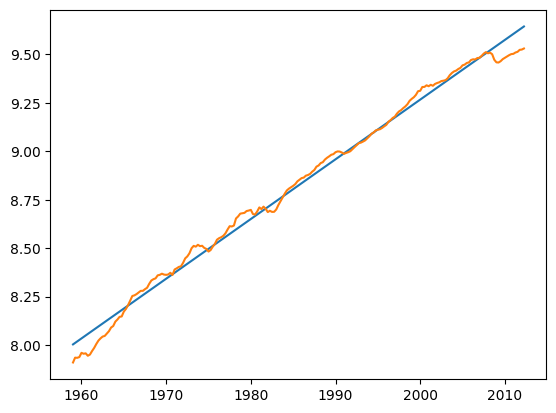

In [99]:
plt.plot(mod.fittedvalues)
plt.plot(lgdp)

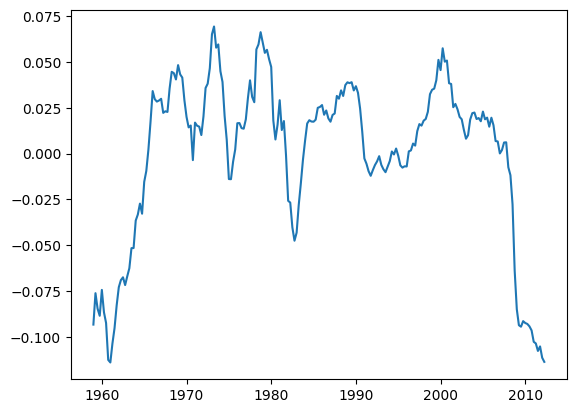

In [102]:
plt.plot(mod.resid)

In [108]:
from statsmodels.tsa.stattools import adfuller

In [110]:
adfuller(mod.resid)

(-7.319909038913166,
 1.201737983250958e-10,
 1,
 211,
 {'1%': -3.46172743446274,
  '5%': -2.8753374677799957,
  '10%': -2.574124089081557},
 -1335.9468865984113)

# 9.14

In [112]:
import statsmodels.formula.api as smf

In [115]:
usm #usar tb3m e gs10

,year,mon,day,rgnp,tb3m,gs10,m1sk
1959-01-01,1959,1,1,2725.1,2.773333,3.990000,139.3333
1959-04-01,1959,4,1,2793.6,3.000000,4.256667,140.5333
1959-07-01,1959,7,1,2791.5,3.540000,4.503333,141.5333
1959-10-01,1959,10,1,2802.2,4.230000,4.583333,140.3000
1960-01-01,1960,1,1,2864.0,3.873333,4.486667,139.9000
...,...,...,...,...,...,...,...
2011-04-01,2011,4,1,13486.1,0.046667,3.210000,1926.7670
2011-07-01,2011,7,1,13534.7,0.023333,2.426667,2077.8000
2011-10-01,2011,10,1,13672.9,0.013333,2.046667,2153.8000
2012-01-01,2012,1,1,13693.8,0.066667,2.036667,2223.0000


In [118]:
ltb3m = np.log(usm['tb3m'])
gs10 = np.log(usm['gs10'])

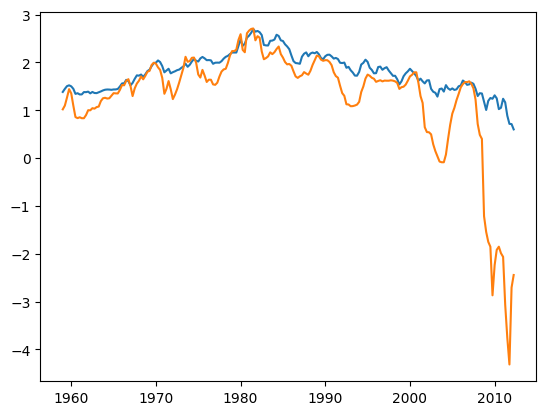

In [121]:
plt.plot(gs10)
plt.plot(ltb3m)

In [127]:
olsres = sm.OLS(gs10, ltb3m).fit()
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   gs10   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.703
Method:                 Least Squares   F-statistic:                              507.1
Date:                Sat, 10 Aug 2024   Prob (F-statistic):                    2.96e-58
Time:                        17:12:22   Log-Likelihood:                         -304.24
No. Observations:                 214   AIC:                                      610.5
Df Residuals:                     213   BIC:                                      613.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tb3m           0.8975      0.040     22.520      0.000       0.819       0.976
==============================================================================
Omnibus:                      158.844   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1134.879
Skew:                           3.068   Prob(JB):                    3.66e-247
Kurtosis:                      12.467   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

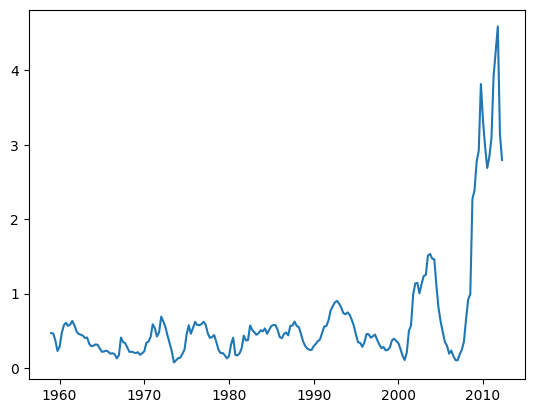

In [128]:
plt.plot(olsres.resid)

In [130]:
from statsmodels.tsa.stattools import coint

In [131]:
coint(gs10, ltb3m)

(-2.129462526905889,
 0.460979218489889,
 array([-3.94859636, -3.3649663 , -3.06442169]))

não são cointegradas...